In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0) 
print('Data Shape:', data.shape)
data.head()

Data Shape: (200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


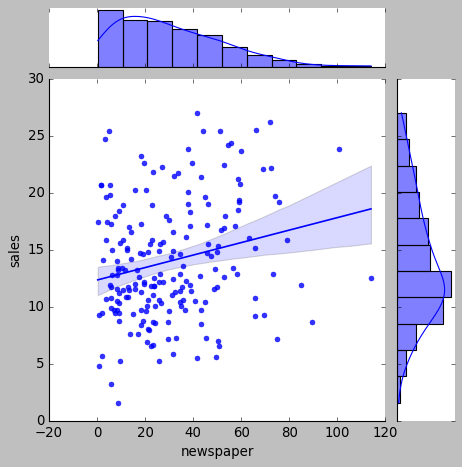

In [6]:
#EDA
plt.style.use("classic")
sns.jointplot('newspaper','sales',data=data,kind='reg')
plt.show()

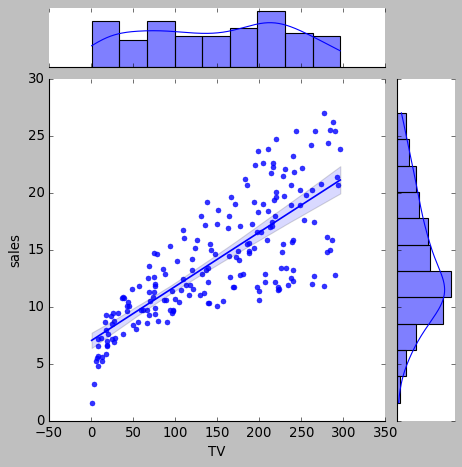

In [7]:
plt.style.use("classic")
sns.jointplot('TV','sales',data=data,kind='reg')
plt.show()

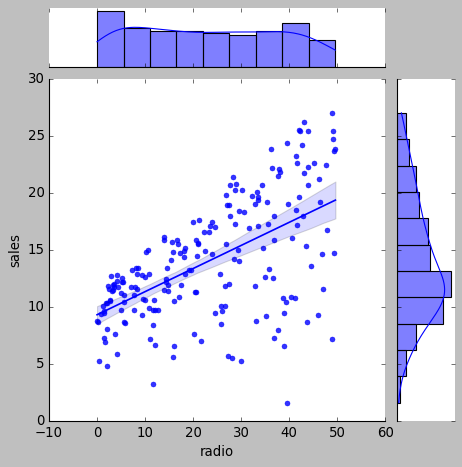

In [8]:
plt.style.use("classic")
sns.jointplot("radio","sales",data=data, kind="reg")
plt.show()

In [8]:
#Out of all indeoendant variables, it is observed that TV is showind more linear in positive direction

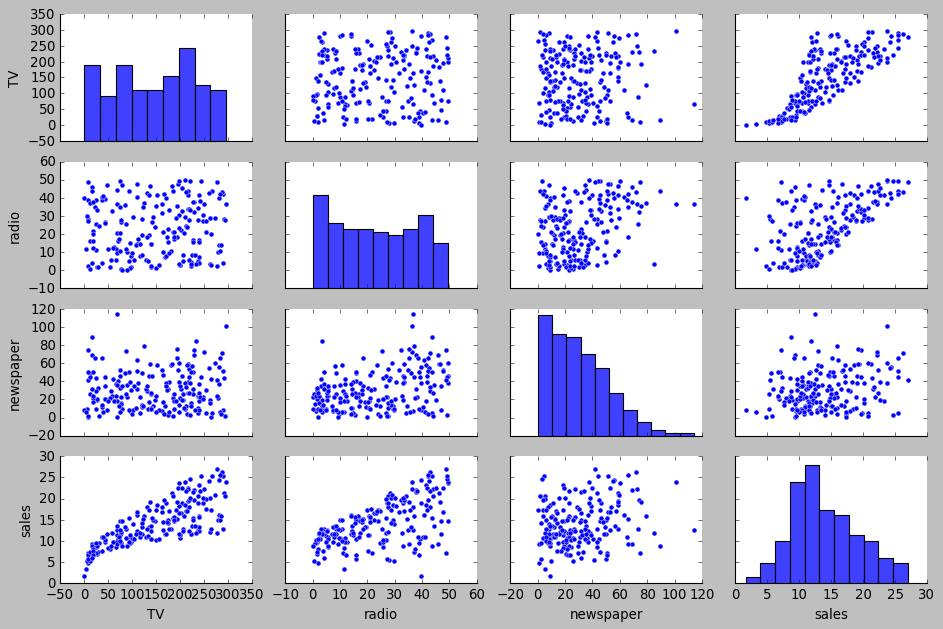

In [9]:
sns.pairplot(data, size = 2, aspect=1.5)
plt.show()

<AxesSubplot:>

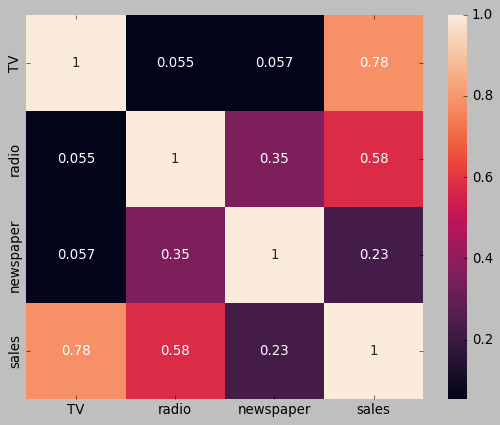

In [10]:
#heatmap
sns.heatmap(data.corr(), annot=True)

In [11]:
'''
1. String relation between TV and sales
2. weak relationship between radio and sales
3. very weak relation between newspaper and sales 
'''

'\n1. String relation between TV and sales\n2. weak relationship between radio and sales\n3. very weak relation between newspaper and sales \n'

In [11]:
feature_cols = ['TV', 'newspaper', 'radio']
X = data[feature_cols]
X.head()

,TV,newspaper,radio
1,230.1,69.2,37.8
2,44.5,45.1,39.3
3,17.2,69.3,45.9
4,151.5,58.5,41.3
5,180.8,58.4,10.8


In [13]:
y = data.sales

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,random_state=100)

In [65]:
print('X Train share:', X_train.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

X Train share: (150, 3)
X test shape: (50, 3)
y train shape: (150,)
y test shape: (50,)


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[feature_cols] = sc.fit_transform(X_train[feature_cols])
X_test[feature_cols] = sc.transform(X_test[feature_cols])

In [16]:
X_train.describe()

,TV,newspaper,radio
count,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.324067e-16,-1.169435e-16,6.809368e-17
std,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.580995e+00,-1.405858e+00,-1.565342e+00
25%,-8.652670e-01,-8.149747e-01,-8.833812e-01
50%,-3.825216e-02,-2.489468e-01,7.536586e-02
75%,8.967765e-01,6.402028e-01,8.907177e-01
max,1.645236e+00,3.732455e+00,1.742752e+00


In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred_train = lr.predict(X_train)

In [19]:
y_pred_test = lr.predict(X_test)

In [20]:
y_pred_train

array([16.25007492, 18.12403914, 12.91574413, 16.82815137, 17.87258461,
       12.28977971,  4.36167238, 11.20021671, 16.13174382, 13.53438847,
       17.09288098, 17.61854133, 20.5933044 , 14.75250306,  9.75731961,
        6.36367644, 14.55845658, 11.83118676,  6.65505685, 14.78224283,
       12.5667467 ,  8.83832022, 12.02351318, 14.08547256, 16.90127539,
       15.0401378 , 14.91894553,  6.8806659 , 18.09492416, 14.41152998,
       10.65290397, 13.17322722, 23.50065214, 14.36857328, 15.03515596,
       19.15134072,  6.36693522, 18.39867174, 16.86873233, 24.22015866,
        9.06474961, 20.31199761, 15.71055311, 15.57115034, 11.55968824,
       20.14839272, 15.41882342, 14.57330541, 16.24356703, 12.37434863,
       16.38836808, 16.74983406, 24.69820309, 12.53179389, 16.63305683,
        9.26604083, 17.66927651, 13.96927978, 13.41605059, 21.31417723,
       15.84373339,  6.48223479, 10.34032152, 17.45897517, 12.21354761,
       18.55285525,  4.31077463, 18.27000245, 15.1893091 , 16.30

In [21]:
y_pred_test

array([10.56363317, 20.01252968, 16.88923482, 19.17971   , 20.95273624,
       13.17442263, 11.82537703, 12.37054122, 20.56982613, 20.94292585,
       10.79961849, 19.56532253,  6.43553509, 15.24813207,  8.9807264 ,
        7.91927124, 16.21621278, 12.06554669, 17.07900185, 11.26788599,
       16.99640501,  9.78797898, 20.80106504, 17.20499594, 15.15601527,
       21.94787225, 19.20984348, 10.06599636, 19.3644989 , 14.8430621 ,
       14.31436678,  7.56075101,  9.99407381, 14.78786958,  7.20776361,
       13.58613467,  7.52095356, 11.74563467, 13.51907415, 15.25349784,
       17.20703351, 13.59014544, 14.32532783, 13.78453325, 11.88713975,
        8.78422153, 12.06547871, 19.2268265 ,  9.08224572,  5.16178056])

In [22]:
y = lr.coef_
c = lr.intercept_

In [23]:
print(y,c)

[4.18816376 0.10479036 2.81840172] 13.869333333333334


In [24]:
feature_cols.insert(0,'Intercept')

In [25]:
feature_cols

['Intercept', 'TV', 'newspaper', 'radio']

In [26]:
coef = lr.coef_.tolist()

In [27]:
coef

[4.1881637556930755, 0.10479035972731876, 2.818401719464999]

In [28]:
coef.insert(0, lr.intercept_)

In [29]:
coef

[13.869333333333334,
 4.1881637556930755,
 0.10479035972731876,
 2.818401719464999]

In [30]:
eq1 = zip(feature_cols, coef)
for c1,c2 in eq1:
    print(c1,c2)

Intercept 13.869333333333334
TV 4.1881637556930755
newspaper 0.10479035972731876
radio 2.818401719464999


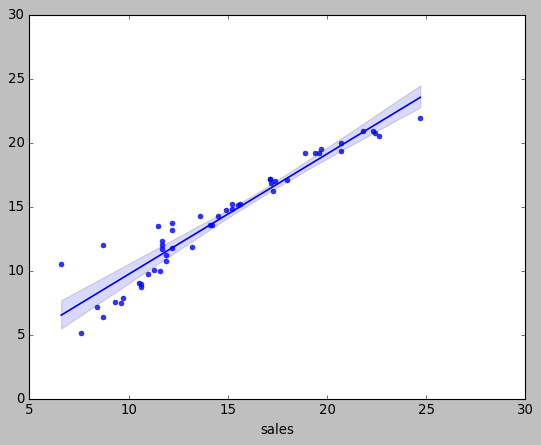

In [31]:
plt.style.use("classic")
sns.regplot(y_test,y_pred_test)
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print(mean_absolute_error(y_train,y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))

1.360621324041085
1.0930078874397895


In [33]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [34]:
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE_train, RMSE_test)

1.7603374103863618 1.4029043306766014


In [35]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(r2_train, r2_test)

0.89436812387285 0.9018593061633757


In [36]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [37]:
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

Adjusted R2 score for training set is 0.8921976058702373
Adjusted R2 score for test set is 0.8954588261305524


In [38]:
##Feature selection
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40, random_state=100)

In [49]:
X_train

,TV,radio
13,23.8,35.1
17,67.8,36.6
102,296.4,36.3
121,141.3,26.8
46,175.1,22.5
...,...,...
88,110.7,40.6
104,187.9,17.2
68,139.3,14.5
25,62.3,12.6


In [50]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred_train = lr2.predict(X_train)
y_pred_test = lr2.predict(X_test)

In [52]:
y_pred_train

array([10.42417446, 12.74877121, 23.29142606, 14.2984208 , 15.05023825,
       19.18431307,  6.35889974, 18.47178538, 16.96779794, 24.15389235,
        9.14042601, 20.38538644, 15.49032027, 15.49592437, 11.55060823,
       20.30665239, 15.51837487, 14.63941361, 16.19547189, 12.42194044,
       16.45506499, 16.92115905, 24.77655974, 12.5167537 , 16.6996271 ,
        9.29174776, 17.85698133, 14.02670711, 13.50610147, 21.25473109,
       15.93069046,  6.29185291, 10.20445902, 17.57206253, 12.28989868,
       18.77240391,  4.24324469, 18.31582691, 15.16518063, 16.22870658,
       20.71808254, 21.53080982,  5.82629176,  8.21343446, 18.3631076 ,
        9.62972238, 10.46752237, 12.34087565, 23.34579245, 13.8509814 ,
        9.85706577,  7.3850344 , 11.69527765, 17.69902596, 15.51124353,
       12.23941832,  9.53035325, 20.50172022,  8.58496   , 10.62467425,
       18.88704766, 18.56157309, 15.26737822, 21.61212869,  5.90981597,
        8.62670808, 10.16506037, 23.22168552,  9.76069832,  9.72

In [53]:
y_pred_test

array([10.40287997, 20.21360175, 16.841016  , 19.11137286, 21.07750509,
       13.23953982, 11.83071817, 12.49059646, 20.60603296, 21.04175818,
       10.88649029, 19.43095404,  6.35145217, 15.37362461,  8.94555727,
        7.96170471, 16.35661869, 12.03552911, 17.22403792, 11.19910292,
       17.17081931,  9.7455315 , 20.7700808 , 17.20526501, 15.22019707,
       22.17113865, 19.20874399, 10.00561296, 19.56264438, 14.93362454,
       14.27464104,  7.62760786,  9.86803859, 14.83256538,  7.18277198,
       13.65634804,  7.45607615, 11.81932958, 13.62154046, 15.11201591,
       17.12742574, 13.73171028, 14.25534346, 13.81996141, 11.95476185,
        8.70118489, 11.73502882, 19.33978317,  8.97229307,  5.13758946,
       16.28277434, 18.13561902, 12.78384936, 16.85949964, 18.02829635,
       12.18040696,  4.23972879, 11.24717885, 16.24520156, 13.42704294,
       17.22431785, 17.52095082, 20.722177  , 14.84667462,  9.82102958,
        6.3833939 , 14.56106838, 11.59444451,  6.59829223, 14.68

In [54]:
print(mean_squared_error(y_train,y_pred_train))

3.4797002004399387


In [57]:
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print("R2 score for training is :", r2_train)
print("R2 score for test is :", r2_test)

R2 score for training is : 0.8937639842482397
R2 score for test is : 0.9034533283261509


In [56]:
#adjusted R2
adj_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training dataset is :", adj_r2_train)
print("adjusted R2 score for test dataset is :", adj_r2_test)

Adjusted R2 score for training dataset is : 0.8919479839789788
adjusted R2 score for test dataset is : 0.9009456225683886
